## Design Patterns Detection


### 5.1. Uploading Data

In [ ]:
%%capture
!wget https://www.dropbox.com/s/mcmeqfxt6crrgpn/Dp_data_modified.zip
!unzip Dp_data_modified.zip

### 5.2. Libraries Installation


In [ ]:
import glob
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode

### 5.3. Read Data and Data Preprocessing for Trainset and Testset
**Steps:**
1. "method.csv" is selected among all files to create the dataset.
2. Using glob to search for all method.csv files.
3. For each method.csv, its path and design pattern name are stored in a tuple.
4. List "Tr_files"/"Te_files" is the list of all tuples.
5. dp_func is a function returns the design pattern type.
6. Each method.csv file is read using pandas.
7. For each method.csv, columns ['file', 'class', 'method'] are dropped.
8. Empty method.csv files are excluded. 
9. NaN values are imputed with the most_frequent value through a column.
10. Each method.csv file is now considered as a dataframe and appended in List "Tr_DataFrames"/"Te_DataFrames".
11. Append a row in each dataframe with the summation of columns, then drop all above rows ((each method.csv is just one row).
12. Calling DP_func with the file design pattern name to get the DP type and concatenate it in new column ['Design Pattern'] at each dataframe.
13. Create an empty dataframe "trainset"/"testset" with the same columns, in which each dataframe is appended.
14. Reset index of trainset/testset.
15. Drop target column from trainset and testset to obtain x_train and y_train.


In [ ]:
Tr_path = '/content/Dp_trainset/'
Te_path = '/content/Dp_testset/'
Tr_files = [(f , f.split('/')[3]) for f in glob.glob(Tr_path + "**/*method.csv", recursive=True)] #step (1:4)
Te_files = [(f , f.split('/')[3]) for f in glob.glob(Te_path + "**/*method.csv", recursive=True)] 

In [ ]:
Creational = ['Abstract_factory','Builder','Factory','Prototype','Singleton']
Structural = ['Adapter','Bridge','Composite','Decorator','Facade','Flyweight','Proxy']
def dp_func(pattern):
  if pattern in Creational:                                                                      #step (5)
    return 'Creational'
  elif pattern in Structural:
    return 'Structural'
  else:
    return 'Behavioral'

In [ ]:
Tr_DataFrames = []
c = 0 #flag to create an empty data frame in first iteration only
count = 0 #counter for number of empty files
for f in range(len(Tr_files)):
  df = pd.read_csv(Tr_files[f][0])                                                               #step (6)
  df = df.drop(['file', 'class', 'method'], axis=1)                                              #step (7)
  
  if df.empty == False:                                                                          #step (8)
    df.fillna(df.mode().iloc[0],inplace=True)                                                    #step (9)
  
    Tr_DataFrames.append(df)                                                                     #step (10)

    df = df.append(df.sum(numeric_only=True), ignore_index=True)                           
    df = df.iloc[-1:]                                                                            #step (11)
    
    pattern = Tr_files[f][1]
    df['Design Pattern'] = dp_func(pattern)                                                      #step (12)

    if c == 0:
      col_names =  list(df.columns)
      trainset = pd.DataFrame(columns = col_names)                                               #step (13)
      trainset = trainset.append(df)
      c = 1
    else:
      trainset = trainset.append(df)
  
  else:
    count += 1 

trainset = trainset.reset_index(drop=True)                                                       #step (14)

print(f'Number of method.csv files in trainset : {len(Tr_files)}')
print(f'Number of empty method.csv files in trainset : {count}')
print(f'Trainset shape : {trainset.shape}')

Number of method.csv files in trainset : 369
Number of empty method.csv files in trainset : 1
Trainset shape : (368, 29)


In [ ]:
trainset

,constructor,line,cbo,wmc,rfc,loc,returnsQty,variablesQty,parametersQty,methodsInvokedQty,methodsInvokedLocalQty,methodsInvokedIndirectLocalQty,loopQty,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty,hasJavaDoc,Design Pattern
0,0,63,10,9,5,23,4,3,1,5,0,0,0,0,0,0,2,0,3,0,0,0,0,0,28,17,0,0,Creational
1,0,119,8,8,6,33,5,2,5,6,0,0,0,0,0,0,10,0,7,5,0,0,0,0,42,16,0,0,Creational
2,7,131,17,23,18,74,4,3,2,18,0,0,0,1,1,0,11,4,8,0,1,0,0,0,121,29,0,0,Creational
3,7,251,41,36,26,121,6,10,7,26,4,4,0,0,0,0,20,0,17,0,2,0,0,0,146,4132,0,0,Creational
4,6,216,16,19,9,65,8,8,43,9,0,0,0,0,0,0,28,0,15,4,0,0,0,0,75,2075,0,0,Creational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,144,7,13,6,47,4,4,12,6,1,1,0,0,0,0,10,10,13,7,2,0,0,0,45,33,0,0,Behavioral
364,0,22,5,7,6,22,0,2,7,6,0,0,0,0,0,0,4,0,3,3,0,0,0,0,31,15,0,0,Behavioral
365,1,136,9,17,11,53,8,5,1,11,1,1,0,4,0,0,8,2,6,0,3,0,0,0,51,22,0,0,Behavioral
366,1,39,5,7,3,24,4,1,12,3,0,0,0,0,0,0,3,6,4,6,0,0,0,0,28,15,0,0,Behavioral


In [ ]:
Te_DataFrames = []
c = 0 #flag to create an empty data frame in first iteration only
count = 0 #counter for number of empty files
for f in range(len(Te_files)):
  df = pd.read_csv(Te_files[f][0])                                                               #step (6)
  df = df.drop(['file', 'class', 'method'], axis=1)                                              #step (7)
  
  if df.empty == False:                                                                          #step (8)
    df.fillna(df.mode().iloc[0],inplace=True)                                                    #step (9)
  
    Te_DataFrames.append(df)                                                                     #step (10)

    df = df.append(df.sum(numeric_only=True), ignore_index=True)                           
    df = df.iloc[-1:]                                                                            #step (11)
    
    pattern = Tr_files[f][1]
    df['Design Pattern'] = dp_func(pattern)                                                      #step (12)

    if c == 0:
      col_names =  list(df.columns)
      testset = pd.DataFrame(columns = col_names)                                                #step (13)
      testset = testset.append(df)
      c = 1
    else:
      testset = testset.append(df)
  
  else:
    count += 1 

testset = testset.reset_index(drop=True)                                                         #step (14)

print(f'Number of method.csv files in testset : {len(Te_files)}')
print(f'Number of empty method.csv files in testset : {count}')
print(f'Testset shape : {testset.shape}')

Number of method.csv files in testset : 114
Number of empty method.csv files in testset : 3
Testset shape : (111, 29)


In [ ]:
testset

,constructor,line,cbo,wmc,rfc,loc,returnsQty,variablesQty,parametersQty,methodsInvokedQty,methodsInvokedLocalQty,methodsInvokedIndirectLocalQty,loopQty,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty,hasJavaDoc,Design Pattern
0,0,130,18,9,4,27,6,3,1,4,0,0,0,0,0,0,0,0,3,0,0,0,0,0,40,15,0,0,Creational
1,0,72,10,6,0,14,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,4,0,0,Creational
2,0,46,5,9,4,25,5,0,2,4,0,0,0,0,0,0,6,0,0,0,1,0,0,0,21,1036,0,0,Creational
3,0,290,34,28,17,79,10,4,2,17,0,0,0,0,0,0,8,0,4,0,0,0,0,0,103,8236,0,0,Creational
4,10,2554,71,101,69,357,25,27,69,69,6,5,7,3,0,6,43,32,65,18,16,0,0,0,489,103,0,6,Creational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4,91,14,13,7,40,0,3,5,7,0,0,0,0,0,0,3,0,4,0,0,0,0,0,32,1062,0,0,Creational
107,2,83,3,7,5,17,3,0,2,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,12,1029,0,0,Creational
108,0,132,8,14,12,42,0,2,4,12,0,0,0,0,0,0,6,0,4,0,0,0,0,0,39,28,0,0,Creational
109,7,436,25,27,26,133,12,9,15,26,1,1,1,0,0,1,40,47,30,9,1,1,0,0,147,1056,0,0,Creational


In [ ]:
x_train = trainset.drop(['Design Pattern'], axis=1)
y_train = trainset['Design Pattern']                                                             #step (15)
x_test = testset.drop(['Design Pattern'], axis=1)
y_test = testset['Design Pattern']

### 5.4. Feature Engineering using Feature Importance 
In this section:
- Feature engineering is applied using random forest classifier to fit the data and important features are selected through (feature_importances_) attribute. 
- Bar chart is plotted to visualize the most important features.
- Threshold of 0.012 is set to drop all features that have importance below this threshold.
- Finally and as a result, 4 features are dropped and this increases model accuracy. 

P.S. Model accuracy without this step was below 50%



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
importance = rf.feature_importances_

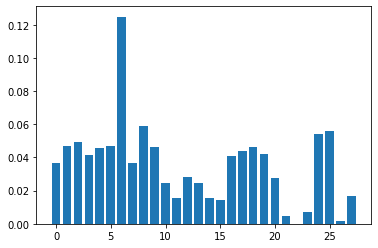


98.62% are represented by 24 features
These features indices are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 27]
So, the indices of columns that should be dropped are : [21, 22, 23, 26]


In [ ]:
from matplotlib import pyplot
FT_Import = []
for i,v in enumerate(importance):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  if v > 0.012:
    FT_Import.append((i,v))
 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

sum = 0
idx = []
for j in FT_Import:
  idx.append(j[0])
  sum += j[1]

print(f'\n{sum*100:0.2f}% are represented by {len(FT_Import)} features')
print(f'These features indices are : {idx}')
drop_idx = [i for i in range(28) if i not in idx]
print(f'So, the indices of columns that should be dropped are : {drop_idx}')

In [ ]:
drop_idx = np.array(drop_idx)
x_train = x_train.drop(x_train.columns[drop_idx], axis=1)
x_test = x_test.drop(x_test.columns[drop_idx], axis=1)

### 5.5. Feature Scaling
- Data is scaled using Standard scaling.

- Standard scaling: transform all features to have mean = 0 and standard deviation = 1. And by assuming that all features follow normal distribution, we can say that standard scaling turns featrues to be $\sim N(0,1)$.
</span> <br>
$$x_i = \frac{x_i - mean(\mathbf{x})}{stdev(\mathbf{x})}$$ <br>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 5.6. Ensemble Learning Model (Random Forest)
- Hyper parameters tunning is implemented using grid search for the following parameters:<br>
</span>n estimators<br>
max features<br>
min impurity decrease 

- Tunning result :  {'bootstrap': True, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'n_estimators': 17}

- After tunned parameters obtained, the code for tunning is commented.

In [ ]:
Accuracy = []

In [ ]:
# from sklearn.model_selection import GridSearchCV

# max_features = ['auto', 'sqrt', 'log2']
# min_impurity_decrease= [x for x in np.linspace(start = 0, stop = 2, num = 20)]
# bootstrap = [True]

# param_grid = {'n_estimators':list(range(1, 19)), 'max_features': max_features, 'min_impurity_decrease': min_impurity_decrease, 'bootstrap': bootstrap}

# clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                             param_grid=param_grid,
#                             scoring='accuracy',
#                             verbose=1, n_jobs=-1,
#                             cv=7)

# clf.fit(x_train, y_train)
# print('Best Score: ', clf.best_score_)
# print('Best Params: ', clf.best_params_)

Fitting 7 folds for each of 1080 candidates, totalling 7560 fits
Best Score:  0.6959361393323658
Best Params:  {'bootstrap': True, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'n_estimators': 17}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(bootstrap=True, max_features='auto', min_impurity_decrease=0.0, n_estimators=17, random_state=42)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
acc = round(accuracy_score(y_test, y_pred),3)
print(f'Random Forest accuracy: {acc*100:0.2f}%')
Accuracy.append(acc)

Random Forest accuracy: 82.90%


### 5.6. Decision Tree Model
- Grid search is implemented to get best parameters.
- Tunning result:  {'ccp_alpha': 0.05, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
- After tunned parameters obtained, the code for tunning is commented.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .05, .001],
              'max_depth' : list(range(5,20)),
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=7, verbose=True)
grid_search.fit(x_train, y_train)
print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

Fitting 7 folds for each of 270 candidates, totalling 1890 fits
Best Score:  0.7094132282811528
Best Params:  {'ccp_alpha': 0.05, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=6, max_features='auto', random_state=42)
tree.fit(x_train, y_train)
pred = tree.predict(x_test)
acc = round(accuracy_score(y_test,  pred),3)
print(f'Decision Tree accuracy: {acc*100:0.2f}%')
Accuracy.append(acc)

Decision Tree accuracy: 88.30%


### 5.8. KNN Model
- Grid search is implemented to get best parameters.
- After tunned parameters obtained, the code for tunning is commented.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']}

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(), cv=7, scoring='accuracy', param_grid=param_grid)

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']

print('Best Score: ', grid_search_clf.best_score_)
print('Best Params: ', grid_search_clf.best_params_)

Best Score:  0.6849471283433548
Best Params:  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc = round(accuracy_score(y_test, y_pred),3)
print(f'KNN accuracy: {acc*100:0.2f}%')
Accuracy.append(acc)

KNN accuracy: 80.20%


### 5.9. Comparison between models accuracy and conclusion 
- It seems that Decision Tree Classifier has the highest accuracy (88.3%) thanks to Minimal cost-complexity pruning applied (ccp_alpha=0.05),which is an algorithm used to prune a tree to avoid over-fitting. 

In [ ]:
Model = ['Random Forest','Decision Tree','KNN']
eval_df = pd.DataFrame({'Model': Model, 'Accuracy': Accuracy})
eval_df.style.hide_index()

Model,Accuracy
Random Forest,0.829000
Decision Tree,0.883000
KNN,0.802000
